# Practical example: Robust Linear Regression on Max/MinTemperature

This type of linear regression is applied in cases where there are outliers, which are characterized
by lacking other close points or observations, so that when trying to adapt a model to these data,
the line will attempt to pass close to them, thereby greatly affecting the result obtained.
One solution is to use algorithms that have a robust error function (HUBER) or a more robust
algorithm (RANSAC).

Multiple linear regression is a generalization of the previous case in which any number of input
variables X can be used to obtain a prediction of the y value.

In the following example, we are going to generate random simple linear regression data, so data
with a single feature or input variable. A series of outliers will be added to this dataset and we will
compare the simple linear regression with the actual value, which is the one obtained by means
of a robust algorithm, RANSAC, and by means of an algorithm with a robust error function,
HUBER.

Import required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model, datasets


Next, generate the function using a tool from the “sklearn” library, which allows us to define the
number of samples, as well as the number of features, and makes a simple linear regression with
the actual data, thereby giving us the coefficient.

In [2]:
#Generate random data with a single variable
n_samples = 1000
X, y, coef = datasets.make_regression(n_samples=n_samples,
                                      n_features=1,
                                      n_informative=1,
                                      noise=10,
                                      coef=True,
                                      random_state=0)

Add the outliers.

In [3]:
n_outliers = 50
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers,1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

Generate the linear predictor and define the linear model

In [4]:
regressor_linear = linear_model.LinearRegression()


Adjust the model using the Least Squares

In [ ]:
regressor_linear.fit(X,y)


Generate the predictor with the robust HUBER error function.

In [6]:
#generate predictor with robust HUBER error function
regressor_huber = sm.RLM(y, X, M = sm.robust.norms.HuberT())

In [7]:
#adjust model using iteratively reweighted least squares
hub_results = regressor_huber.fit()

Generate the predictor with a robust RANSAC algorithm.

In [8]:
#generate predictor with robust ransac algorithm
regressor_ransac = linear_model.RANSACRegressor()
regressor_ransac.fit(X,y)
inlier_mask = regressor_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

Calculate the predictions of the values.

In [9]:
#calculate predictions
y_pred_linear = regressor_linear.predict(X)
y_pred_ransac = regressor_ransac.predict(X)
y_pred_huber = hub_results.fittedvalues

Show the coefficients calculated for each predictor, for a comparison.

In [10]:
#show coefficients calculated for each predictor, for a comparison
#compare coeffs estimated by each alg
data = [coef, regressor_linear.coef_[0], regressor_ransac.estimator_.coef_[0], hub_results.params[0]]
index = ['real','linear regression','RANSAC', 'Huber']
coeff = pd.DataFrame(data=data, index=index)

print(coeff)

                           0
real               82.190391
linear regression  54.172364
RANSAC             82.085332
Huber              79.123250


It can be clearly observed that in the case that the dataset has outliers, using a robust algorithm
gives a better solution, even better than if we only use robustness in the error function.

Next, we can produce the comparative result.

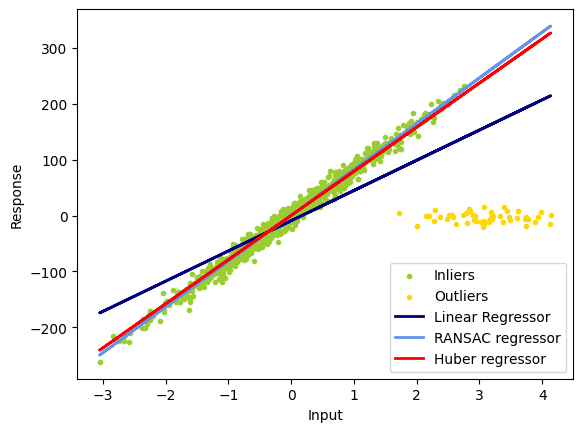

In [11]:
# viualize
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen',marker='.',label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold',marker='.',label='Outliers')
plt.plot(X, y_pred_linear, color='navy', linewidth=2,label='Linear Regressor')
plt.plot(X, y_pred_ransac, color='cornflowerblue',linewidth=2,label='RANSAC regressor')
plt.plot(X, y_pred_huber, color='red', linewidth=2, label='Huber regressor')
plt.legend(loc='lower right')
plt.xlabel('Input')
plt.ylabel('Response')
plt.show()